Гипотеза 3: Профессиональные различия в параметрах сна

Разные профессиональные группы имеют характерные особенности сна из-за специфики рабочих графиков, уровня стресса и физической нагрузки. Например, врачи и медсестры, работающие в сменном режиме, могут иметь более низкое качество сна и большую распространенность расстройств сна по сравнению с офисными работниками, несмотря на более высокую физическую активность первых.

Проверка данных после очистки:
Осталось строк: 155
Всего уникальных профессий: 10

Профессии с n >= 5:
  Nurse: n = 64
  Teacher: n = 31
  Salesperson: n = 30
  Doctor: n = 7
  Accountant: n = 7
  Engineer: n = 6
  Lawyer: n = 5

Проверка на вариативность значений качества сна:
  Nurse                - σ=1.586, unique=3 ОК
  Teacher              - σ=0.601, unique=4 ОК
  Salesperson          - σ=0.000, unique=1 ПРОБЛЕМА: все значения одинаковые
  Doctor               - σ=1.254, unique=3 ОК
  Accountant           - σ=0.378, unique=2 ОК
  Engineer             - σ=1.378, unique=4 ОК
  Lawyer               - σ=0.548, unique=2 ОК
Структура датасета:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          4   Male   28  Sales Representative             5.9   
1          5   Male   28  Sales Representative             5.9   
2          6   Male   28     Software Engineer             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0       

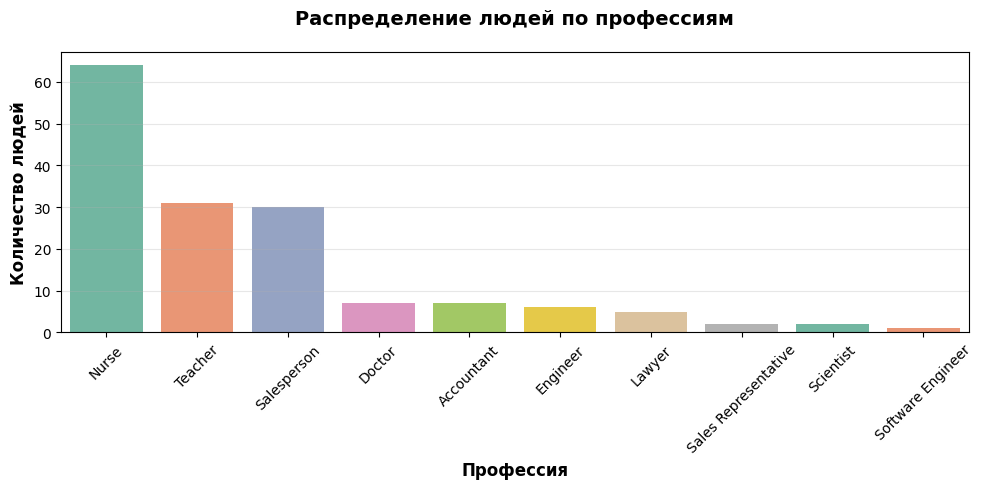

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, shapiro
import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Очистка данных
df_clean = df.drop_duplicates().dropna().reset_index(drop=True)

print("="*80)
print("Проверка данных после очистки:")
print(f"Осталось строк: {len(df_clean)}")
print(f"Всего уникальных профессий: {df_clean['Occupation'].nunique()}")
print("="*80)

# Используем только профессии с достаточным размером выборки
min_sample_size = 5
profession_counts = df_clean['Occupation'].value_counts()
valid_occupations = [occ for occ, count in profession_counts.items() 
                     if count >= min_sample_size]

print(f"\nПрофессии с n >= {min_sample_size}:")
for occ in valid_occupations:
    print(f"  {occ}: n = {profession_counts[occ]}")
print("="*80)

# Проверка на одинаковые значения качества сна
print("\nПроверка на вариативность значений качества сна:")
for occ in valid_occupations:
    subset = df_clean[df_clean['Occupation'] == occ]['Quality of Sleep']
    std_val = subset.std()
    unique_vals = subset.nunique()
    status = "ОК" if std_val > 0 else "ПРОБЛЕМА: все значения одинаковые"
    print(f"  {occ:20} - σ={std_val:.3f}, unique={unique_vals} {status}")
print("="*80)

print("Структура датасета:")
print(df_clean.head(3))

# Распределение людей по профессиям (barplot)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='Occupation', order=df_clean['Occupation'].value_counts().index, palette="Set2")
plt.title('Распределение людей по профессиям', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Профессия', fontsize=12, fontweight='bold')
plt.ylabel('Количество людей', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



Метода 1: Описательная статистика с боксплотами и групповыми таблицами

Краткое описание: Метод включает расчет средних значений, медиан и стандартных отклонений качества сна, продолжительности сна и уровня стресса для каждой профессиональной группы, а также визуализацию распределений с помощью боксплотов для выявления визуальных различий.

Почему используем:
Этот метод прост в реализации и интерпретации, не требует предположений о распределении данных и позволяет быстро выявить общие тенденции и аномалии между группами без статистических тестов.

Значимость:
Метод дает наглядное представление о различиях в параметрах сна между профессиями, помогает выбрать группы для дальнейшего детального анализа и служит основой для формулировки более точных гипотез о конкретных профессиональных различиях.

Описательная статистика качества сна по профессиям:
                      mean  median   std  count
Occupation                                     
Accountant            7.14     7.0  0.38      7
Doctor                7.29     7.0  1.25      7
Engineer              7.50     8.0  1.38      6
Lawyer                7.60     8.0  0.55      5
Nurse                 7.34     6.0  1.59     64
Sales Representative  4.00     4.0  0.00      2
Salesperson           6.00     6.0  0.00     30
Scientist             4.00     4.0  0.00      2
Software Engineer     4.00     4.0   NaN      1
Teacher               6.81     7.0  0.60     31
Описательная статистика продолжительности сна по профессиям:
                      mean  median   std  count
Occupation                                     
Accountant            6.66    6.60  0.24      7
Doctor                7.21    7.30  0.89      7
Engineer              7.50    7.80  0.69      6
Lawyer                7.34    7.40  0.19      5
Nurse                 7

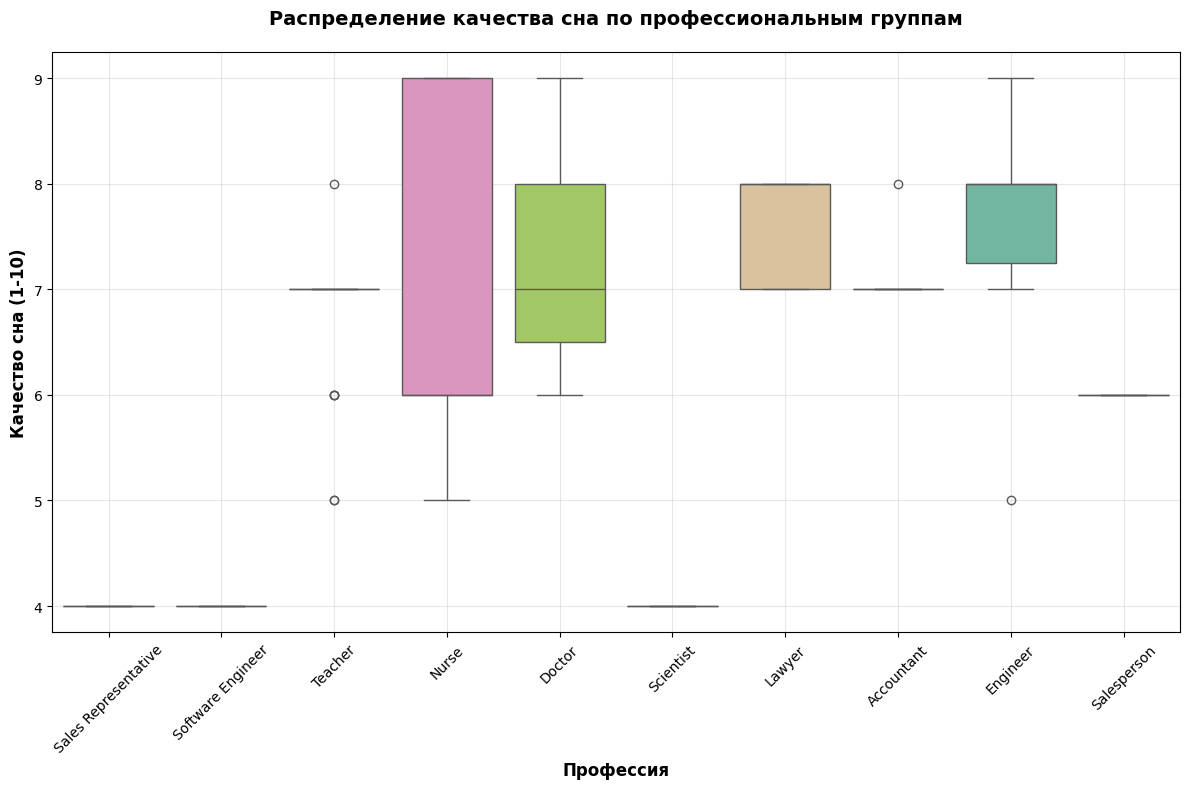

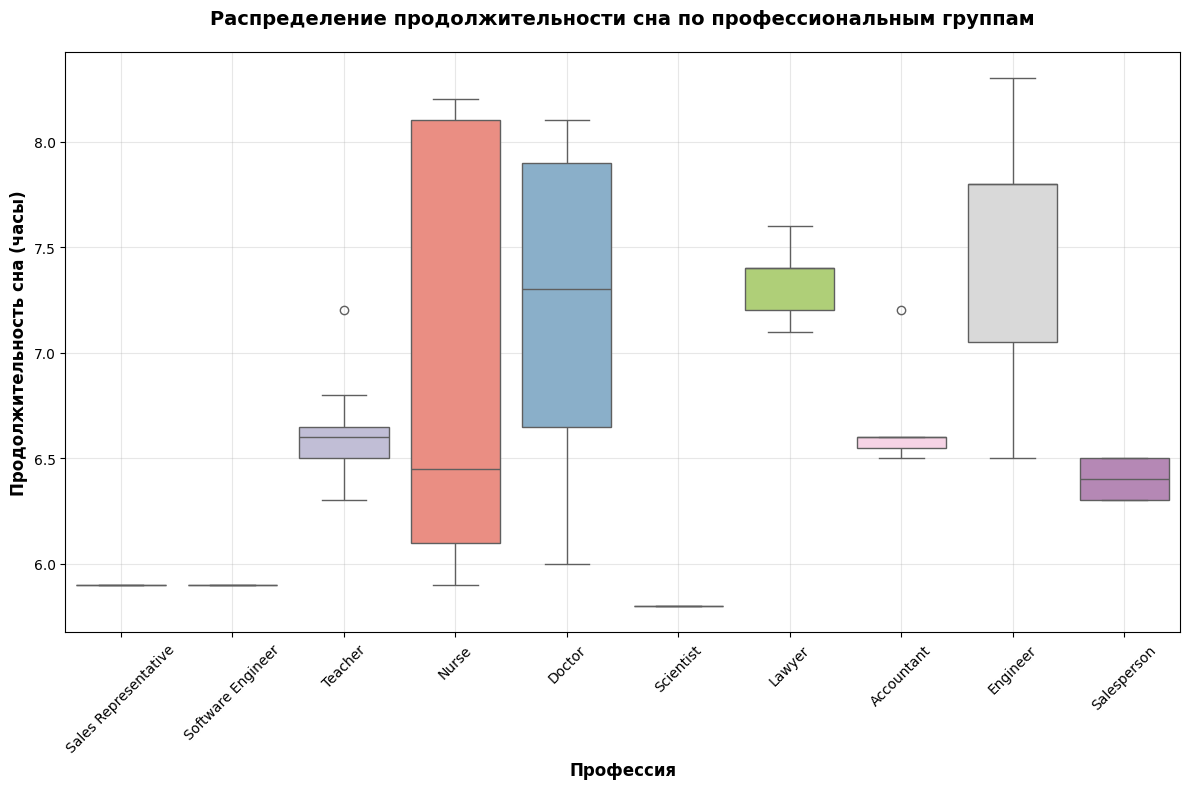

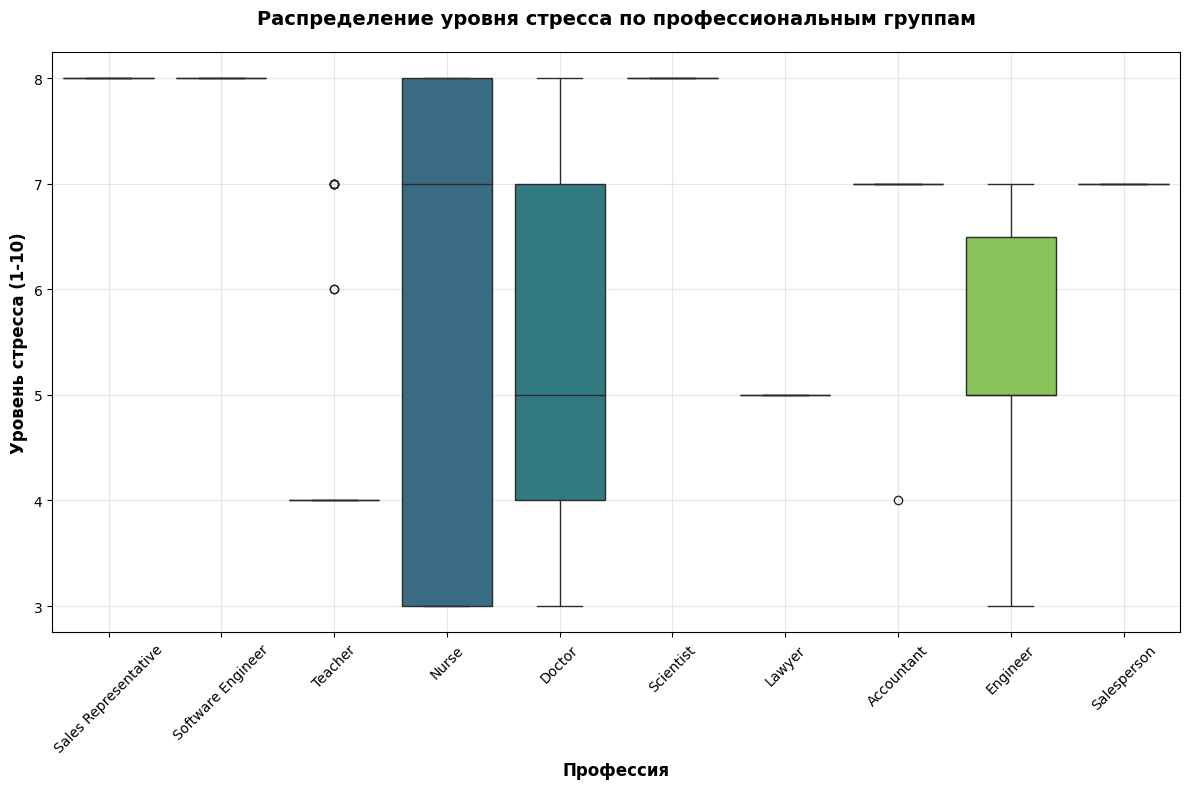

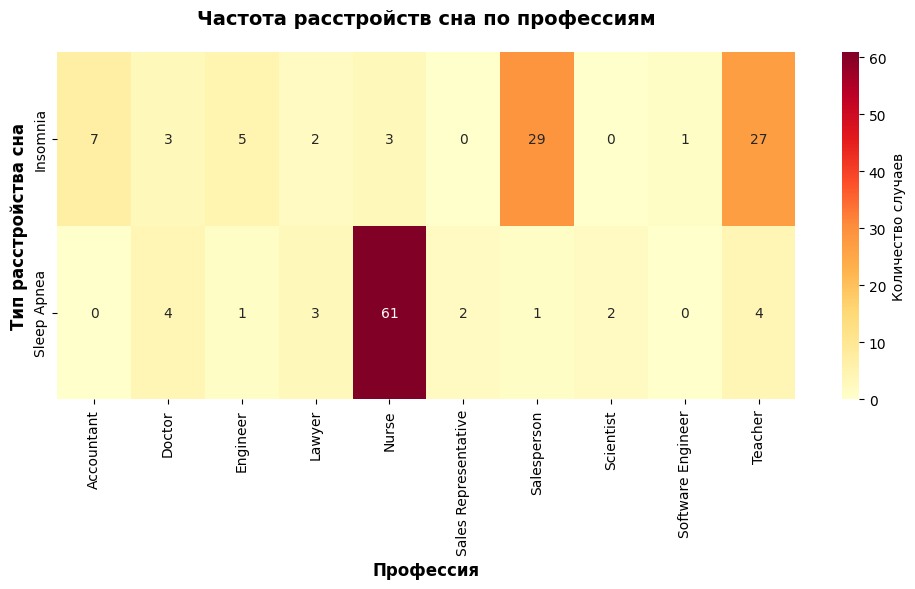

In [2]:
# Вычисление описательной статистики по профессиям
desc_sleep_quality = df_clean.groupby('Occupation')['Quality of Sleep'].agg(['mean', 'median', 'std', 'count']).round(2)
desc_sleep_duration = df_clean.groupby('Occupation')['Sleep Duration'].agg(['mean', 'median', 'std', 'count']).round(2)
desc_stress = df_clean.groupby('Occupation')['Stress Level'].agg(['mean', 'median', 'std', 'count']).round(2)

# Расчет частоты расстройств сна по профессиям
sleep_disorder_freq = df_clean.groupby('Occupation')['Sleep Disorder'].value_counts().unstack(fill_value=0)

print("="*80)
print("Описательная статистика качества сна по профессиям:")
print(desc_sleep_quality)
print("="*80)
print("Описательная статистика продолжительности сна по профессиям:")
print(desc_sleep_duration)
print("="*80)
print("Описательная статистика уровня стресса по профессиям:")
print(desc_stress)
print("="*80)
print("Частота расстройств сна по профессиям:")
print(sleep_disorder_freq)
print("="*80)

# Визуализация: Боксплоты качества сна по профессиям
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='Occupation', y='Quality of Sleep', palette='Set2')
plt.title('Распределение качества сна по профессиональным группам', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Профессия', fontsize=12, fontweight='bold')
plt.ylabel('Качество сна (1-10)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Визуализация: Боксплоты продолжительности сна по профессиям
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='Occupation', y='Sleep Duration', palette='Set3')
plt.title('Распределение продолжительности сна по профессиональным группам', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Профессия', fontsize=12, fontweight='bold')
plt.ylabel('Продолжительность сна (часы)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Визуализация: Боксплоты уровня стресса по профессиям
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='Occupation', y='Stress Level', palette='viridis')
plt.title('Распределение уровня стресса по профессиональным группам', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Профессия', fontsize=12, fontweight='bold')
plt.ylabel('Уровень стресса (1-10)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Тепловая карта частоты расстройств сна
plt.figure(figsize=(10, 6))
sns.heatmap(sleep_disorder_freq.T, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество случаев'})
plt.title('Частота расстройств сна по профессиям', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Профессия', fontsize=12, fontweight='bold')
plt.ylabel('Тип расстройства сна', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Метод 2: Тест Краскела-Уоллиса

Краткое описание:
Это непараметрический статистический тест для сравнения медиан трех и более независимых групп по одной количественной переменной, который ранжирует все наблюдения и сравнивает средние ранги между группами.

Почему используем:
Тест не требует предположения о нормальности распределения данных, устойчив к выбросам и подходит для сравнения более чем двух групп, что идеально для анализа нескольких профессиональных категорий в датасете.

Значимость:
Метод позволяет статистически подтвердить или опровергнуть наличие значимых различий в параметрах сна между профессиональными группами, предоставляя p-значение для оценки надежности результатов и определяя необходимость пост-хок анализов.

In [3]:
# Подготовка данных для теста (только валидные профессии)
sleep_quality_groups = [df_clean[df_clean['Occupation'] == occ]['Quality of Sleep'].values 
                        for occ in valid_occupations]
sleep_duration_groups = [df_clean[df_clean['Occupation'] == occ]['Sleep Duration'].values 
                         for occ in valid_occupations]
stress_level_groups = [df_clean[df_clean['Occupation'] == occ]['Stress Level'].values 
                       for occ in valid_occupations]

# Проверка отсутствия NaN
print("="*80)
print("Финальная проверка на NaN в группах:")
for i, occ in enumerate(valid_occupations):
    nan_count_q = np.sum(np.isnan(sleep_quality_groups[i]))
    nan_count_d = np.sum(np.isnan(sleep_duration_groups[i]))
    nan_count_s = np.sum(np.isnan(stress_level_groups[i]))
    if nan_count_q + nan_count_d + nan_count_s > 0:
        print(f"✗ {occ}: найдено NaN значений (качество:{nan_count_q}, длительность:{nan_count_d}, стресс:{nan_count_s})")
    else:
        print(f"{occ}: NaN не найдено")

# Тест Краскела-Уоллиса для качества сна
print("="*80)
print("Тест Краскела-Уоллиса для качества сна по профессиям:")
h_stat_quality, p_value_quality = kruskal(*sleep_quality_groups)
print(f"H-статистика: {h_stat_quality:.4f}")
print(f"P-значение: {p_value_quality:.6f}")
if p_value_quality < 0.05:
    print("p < 0.05 - статистически значимые различия обнаружены!")
else:
    print("p ≥ 0.05 - статистически значимых различий не обнаружено")
print("="*80)

# Тест Краскела-Уоллиса для продолжительности сна
print("Тест Краскела-Уоллиса для продолжительности сна по профессиям:")
h_stat_duration, p_value_duration = kruskal(*sleep_duration_groups)
print(f"H-статистика: {h_stat_duration:.4f}")
print(f"P-значение: {p_value_duration:.6f}")
if p_value_duration < 0.05:
    print("p < 0.05 - статистически значимые различия обнаружены!")
else:
    print("p ≥ 0.05 - статистически значимых различий не обнаружено")
print("="*80)

# Тест Краскела-Уоллиса для уровня стресса
print("Тест Краскела-Уоллиса для уровня стресса по профессиям:")
h_stat_stress, p_value_stress = kruskal(*stress_level_groups)
print(f"H-статистика: {h_stat_stress:.4f}")
print(f"P-значение: {p_value_stress:.6f}")
if p_value_stress < 0.05:
    print("p < 0.05 - статистически значимые различия обнаружены!")
else:
    print("p ≥ 0.05 - статистически значимых различий не обнаружено")
print("="*80)

# Проверка нормальности для групп с наибольшим количеством наблюдений
print("Проверка нормальности распределения качества сна для крупнейших профессиональных групп:")

# Сортируем валидные профессии по размеру выборки и берем топ-3
top_occupations = sorted(valid_occupations, 
                         key=lambda x: len(df_clean[df_clean['Occupation'] == x]), 
                         reverse=True)[:3]

print(f"Топ-3 профессии по численности: {top_occupations}")
print()

for occupation in top_occupations:
    subset = df_clean[df_clean['Occupation'] == occupation]['Quality of Sleep']
    
    # Проверка на наличие NaN
    if subset.isna().sum() > 0:
        print(f"{occupation:20} (n={len(subset):3}): ✗ Найдено {subset.isna().sum()} NaN значений - ПРОПУСКАЕМ")
        continue
    
    # Проверка на вариативность (нужна для Shapiro-Wilk)
    if subset.std() == 0:
        print(f"{occupation:20} (n={len(subset):3}):Все значения одинаковые (σ=0) - ПРОПУСКАЕМ")
        continue
    
    # Тест Shapiro-Wilk
    stat, pval = shapiro(subset)
    status = "нормальное" if pval > 0.05 else "не нормальное"
    print(f"{occupation:20} (n={len(subset):3}): Shapiro-Wilk p={pval:.4f} - распределение {status}")

print("="*80)


Финальная проверка на NaN в группах:
Nurse: NaN не найдено
Teacher: NaN не найдено
Salesperson: NaN не найдено
Doctor: NaN не найдено
Accountant: NaN не найдено
Engineer: NaN не найдено
Lawyer: NaN не найдено
Тест Краскела-Уоллиса для качества сна по профессиям:
H-статистика: 30.5610
P-значение: 0.000031
p < 0.05 - статистически значимые различия обнаружены!
Тест Краскела-Уоллиса для продолжительности сна по профессиям:
H-статистика: 18.2249
P-значение: 0.005694
p < 0.05 - статистически значимые различия обнаружены!
Тест Краскела-Уоллиса для уровня стресса по профессиям:
H-статистика: 15.4413
P-значение: 0.017088
p < 0.05 - статистически значимые различия обнаружены!
Проверка нормальности распределения качества сна для крупнейших профессиональных групп:
Топ-3 профессии по численности: ['Nurse', 'Teacher', 'Salesperson']

Nurse                (n= 64): Shapiro-Wilk p=0.0000 - распределение не нормальное
Teacher              (n= 31): Shapiro-Wilk p=0.0000 - распределение не нормальное
Sal